In [1]:
# !wget http://www.superdatascience.com/wp-content/uploads/2017/04/Convolutional_Neural_Networks.zip

In [2]:
# !unzip Convolutional_Neural_Networks.zip

https://keras.io/preprocessing/image/

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

Using TensorFlow backend.


In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13686081783824385105
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 1545404416
locality {
  bus_id: 1
}
incarnation: 911972436304515544
physical_device_desc: "device: 0, name: GeForce GTX 750 Ti, pci bus id: 0000:02:00.0"
]


In [5]:
# initializing
classifier = Sequential()
# Step 1  - Convolution
classifier.add(Convolution2D(48, (6, 6), input_shape=(64, 64, 3), activation='relu'))
# step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(4,4)))


# add another convolution layer
# classifier.add(Convolution2D(4, (4, 4), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(4,4)))

# # add another convolution layer
# classifier.add(Convolution2D(64, (4, 4), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(3,3)))


# step 3 - Flattening
classifier.add(Flatten())
# step 4 - full Connection
classifier.add(Dense(64, activation='relu'))
# step 5 - Output layer
classifier.add(Dense(1, activation='sigmoid'))
# compile
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 59, 59, 48)        5232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                602176    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 607,473
Trainable params: 607,473
Non-trainable params: 0
_________________________________________________________________


### image proprocessing & trainning, testing

In [7]:
!ls Convolutional_Neural_Networks/dataset/

single_prediction  test_set  training_set


In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
1, 1.,7., 9

(1, 1.0, 7.0, 9)

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'Convolutional_Neural_Networks/dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'Convolutional_Neural_Networks/dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
from time import time, ctime
start = time()
classifier.fit_generator(
        training_set,
        steps_per_epoch= (8000/32),
        epochs=25,
        validation_data= test_set,
        validation_steps= (2000/32))
eclipse=time()-start
print 'used: {:.2f} s'.format(eclipse)

Epoch 1/25
250/250 [==============================] - 76s - loss: 0.6743 - acc: 0.5767 - val_loss: 0.6298 - val_acc: 0.6699
Epoch 2/25
250/250 [==============================] - 71s - loss: 0.6171 - acc: 0.6644 - val_loss: 0.6229 - val_acc: 0.6310
Epoch 3/25
250/250 [==============================] - 71s - loss: 0.5842 - acc: 0.6956 - val_loss: 0.5540 - val_acc: 0.7198
Epoch 4/25
250/250 [==============================] - 71s - loss: 0.5598 - acc: 0.7123 - val_loss: 0.5461 - val_acc: 0.7243
Epoch 5/25
250/250 [==============================] - 71s - loss: 0.5402 - acc: 0.7258 - val_loss: 0.5229 - val_acc: 0.7369
Epoch 6/25
250/250 [==============================] - 70s - loss: 0.5300 - acc: 0.7372 - val_loss: 0.5171 - val_acc: 0.7500
Epoch 7/25
250/250 [==============================] - 71s - loss: 0.5206 - acc: 0.7389 - val_loss: 0.5298 - val_acc: 0.7419
Epoch 8/25
250/250 [==============================] - 71s - loss: 0.5008 - acc: 0.7525 - val_loss: 0.5006 - val_acc: 0.7525
Epoch 9/

In [12]:
print eclipse
ctime()

1793.50147414


'Thu Oct 26 20:14:35 2017'

In [14]:
eclipse/60

29.89169123570124

### predict

In [124]:
import numpy as np
from keras.preprocessing import image

In [125]:
t1 = image.load_img('./Convolutional_Neural_Networks/dataset/single_prediction/pred/4-ways-cheer-up-depressed-cat.jpg',
                  target_size=(64,64))

In [126]:
type(t1)

PIL.Image.Image

In [ ]:
t1

In [128]:
t1.size

(64, 64)

In [129]:
arr1 = image.img_to_array(t1)
arr1.shape

(64, 64, 3)

In [191]:
arr1[:1][0][0:6]

array([[ 186.,  183.,  190.],
       [ 175.,  172.,  179.],
       [ 153.,  152.,  160.],
       [ 154.,  154.,  164.],
       [ 180.,  180.,  192.],
       [ 206.,  205.,  213.]], dtype=float32)

In [172]:
t2 = image.load_img('./Convolutional_Neural_Networks/dataset/single_prediction/pred/cat_or_dog_1.jpg',
                  target_size=(64,64))

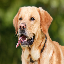

In [173]:
t2

In [174]:
arr2 = image.img_to_array(t2)
arr2.shape

(64, 64, 3)

In [175]:
np.expand_dims(arr1, axis=0).shape

(1, 64, 64, 3)

In [176]:
np.concatenate([arr1, arr2]).shape

(128, 64, 3)

In [177]:
np.concatenate([arr1, arr2], axis=2).shape

(64, 64, 6)

In [178]:
np.concatenate([np.expand_dims(arr1, axis=0), np.expand_dims(arr2, axis=0)]).shape

(2, 64, 64, 3)

#### predict only takes batch of input

In [194]:
classifier.predict(np.expand_dims(arr2, axis=0)/255.0)

array([[ 0.99896753]], dtype=float32)

In [195]:
classifier.predict(np.concatenate([np.expand_dims(arr1, axis=0), np.expand_dims(arr2, axis=0)])/255.0)

array([[ 0.80829364],
       [ 0.99896753]], dtype=float32)

In [196]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

### folder

In [168]:
pred = test_datagen.flow_from_directory(
        'Convolutional_Neural_Networks/dataset/single_prediction/',
        target_size=(64, 64))

Found 4 images belonging to 1 classes.


In [169]:
rl = classifier.predict_generator(pred, steps=1)

In [170]:
rl

array([[ 0.8082937 ],
       [ 0.76738149],
       [ 0.99896753],
       [ 0.07975663]], dtype=float32)

In [171]:
pred.filenames

['pred/51d6e3dcccd3bdac300202a5a3e99de0--pretty-cats-beautiful-cats.jpg',
 'pred/4-ways-cheer-up-depressed-cat.jpg',
 'pred/cat_or_dog_2.jpg',
 'pred/cat_or_dog_1.jpg']